In [14]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [7]:
seed = 10
np.random.seed(seed)
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape)
# 正規化
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# label要變成one-hot encoding
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

(50000, 32, 32, 3)


In [9]:
# 建模
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding="same",input_shape=(X_train.shape[1:]),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)         

In [10]:
#編譯
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
#訓練
history = model.fit(X_train,Y_train,validation_split=0.2,epochs=9,batch_size=128,verbose=2)

Epoch 1/9


2023-11-10 16:06:38.611078: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


313/313 - 10s - loss: 1.6796 - accuracy: 0.3862 - val_loss: 1.3482 - val_accuracy: 0.5287 - 10s/epoch - 32ms/step
Epoch 2/9
313/313 - 10s - loss: 1.3200 - accuracy: 0.5264 - val_loss: 1.1498 - val_accuracy: 0.6040 - 10s/epoch - 32ms/step
Epoch 3/9
313/313 - 10s - loss: 1.1817 - accuracy: 0.5803 - val_loss: 1.0794 - val_accuracy: 0.6236 - 10s/epoch - 33ms/step
Epoch 4/9
313/313 - 11s - loss: 1.0877 - accuracy: 0.6112 - val_loss: 1.0057 - val_accuracy: 0.6494 - 11s/epoch - 35ms/step
Epoch 5/9
313/313 - 11s - loss: 1.0207 - accuracy: 0.6381 - val_loss: 0.9530 - val_accuracy: 0.6754 - 11s/epoch - 34ms/step
Epoch 6/9
313/313 - 11s - loss: 0.9711 - accuracy: 0.6577 - val_loss: 0.9023 - val_accuracy: 0.6914 - 11s/epoch - 35ms/step
Epoch 7/9
313/313 - 11s - loss: 0.9289 - accuracy: 0.6757 - val_loss: 0.8750 - val_accuracy: 0.6969 - 11s/epoch - 34ms/step
Epoch 8/9
313/313 - 11s - loss: 0.8840 - accuracy: 0.6882 - val_loss: 0.8658 - val_accuracy: 0.6977 - 11s/epoch - 34ms/step
Epoch 9/9
313/313 

In [11]:
#評估模型
loss, accuracy = model.evaluate(X_test,Y_test)
print("loss:{},accuracy:{}".format(loss,accuracy))

313/313 [==============================] - 2s 6ms/step - loss: 0.8393 - accuracy: 0.7075
loss:0.8392676711082458,accuracy:0.7074999809265137


In [13]:
print(history.history)

{'loss': [1.6796159744262695, 1.3199942111968994, 1.18167245388031, 1.0876667499542236, 1.0207340717315674, 0.9710941314697266, 0.9288787841796875, 0.8840042948722839, 0.8442422747612], 'accuracy': [0.3861750066280365, 0.5264250040054321, 0.5802749991416931, 0.6111500263214111, 0.6380500197410583, 0.65767502784729, 0.6757000088691711, 0.6882249712944031, 0.7000749707221985], 'val_loss': [1.348153829574585, 1.1497979164123535, 1.079438328742981, 1.0056827068328857, 0.9530300498008728, 0.9023468494415283, 0.8750269412994385, 0.8658146262168884, 0.8331883549690247], 'val_accuracy': [0.5286999940872192, 0.6039999723434448, 0.6236000061035156, 0.649399995803833, 0.6754000186920166, 0.6913999915122986, 0.6969000101089478, 0.697700023651123, 0.713100016117096]}


range(1, 10)
[1.348153829574585, 1.1497979164123535, 1.079438328742981, 1.0056827068328857, 0.9530300498008728, 0.9023468494415283, 0.8750269412994385, 0.8658146262168884, 0.8331883549690247]


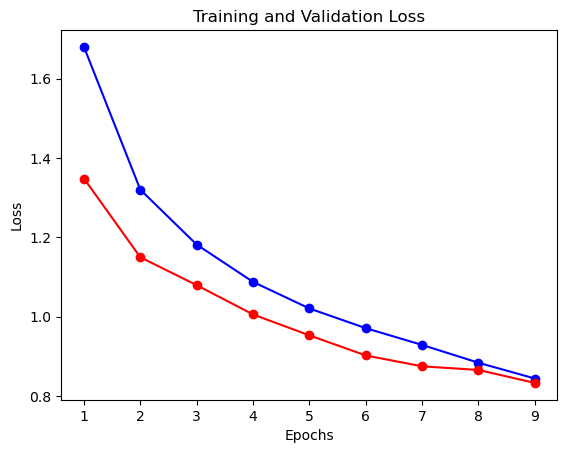

In [21]:
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1,len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs,loss,"bo-",label="Training Loss")
plt.plot(epochs,val_loss,"ro-",label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

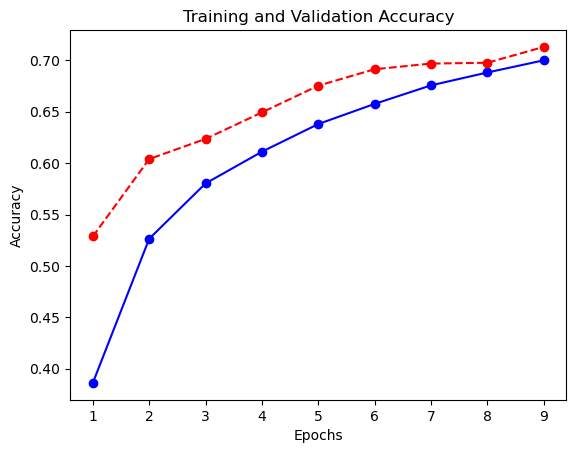

In [22]:
# 顯⽰訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()